# Classifying seeds  

This is a small analysis project using classification techniques to identify different types of seeds. 
Dataset is sourced from UCI database: https://archive.ics.uci.edu/ml/datasets/seeds

The main goal of this project was to find the highest classification rate using two different classification models, K-Nearest Neighbors and Random Forest. 
In addition, some visualization work was done on the data.  

## Dataset  

The dataset contains seven attributes: 
- seed area
- seed perimeter
- compactness of seed 
- seed length 
- seed width
- asymmetry of seed
- length of seed groove

The class variable is the type of seed: Kama, Rosa, and Canadian, labeled as 1, 2, and 3. The dataset contains 70 observations for each of the three seed types.  

The goal is to see if the attributes can be used to classify the seeds as their respective seed type, and which attributes are most useful in this venture.  

## Preliminary work  
Load the dataset in and examine the first few rows of observations. 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as skl
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# get data, file has spaces and tabs as separators
names = ["area", "perimeter", "compact", "length", 
                    "width", "asymmetry", "groove", "seed_type"]
seeds = pd.read_csv("../data/seeds_dataset.txt", sep = '\s+|\t| ', 
                    header = None, engine= "python",
                    names = names)

# examine data
print(seeds.iloc[0:9])

                    

    area  perimeter  compact  length  width  asymmetry  groove  seed_type
0  15.26      14.84   0.8710   5.763  3.312      2.221   5.220          1
1  14.88      14.57   0.8811   5.554  3.333      1.018   4.956          1
2  14.29      14.09   0.9050   5.291  3.337      2.699   4.825          1
3  13.84      13.94   0.8955   5.324  3.379      2.259   4.805          1
4  16.14      14.99   0.9034   5.658  3.562      1.355   5.175          1
5  14.38      14.21   0.8951   5.386  3.312      2.462   4.956          1
6  14.69      14.49   0.8799   5.563  3.259      3.586   5.219          1
7  14.11      14.10   0.8911   5.420  3.302      2.700   5.000          1
8  16.63      15.46   0.8747   6.053  3.465      2.040   5.877          1


### Summary Statistics  

We can examine the mean and standard deviation of the attributes:  

In [53]:
# put means and SDs in dataframes and print using tabulate
means = pd.DataFrame(seeds.iloc[:,0:7].mean())
print (tabulate(means, headers=["Attribute", "Mean"]), "\n")

sdevs = pd.DataFrame(seeds.iloc[:,0:7].std())
print (tabulate(sdevs, headers=["Attribute", "Standard Deviation"]))


Attribute         Mean
-----------  ---------
area         14.8475
perimeter    14.5593
compact       0.870999
length        5.62853
width         3.2586
asymmetry     3.7002
groove        5.40807 

Attribute      Standard Deviation
-----------  --------------------
area                    2.9097
perimeter               1.30596
compact                 0.0236294
length                  0.443063
width                   0.377714
asymmetry               1.50356
groove                  0.49148


Next, a boxplot can help visualize the attributes' distributions.  

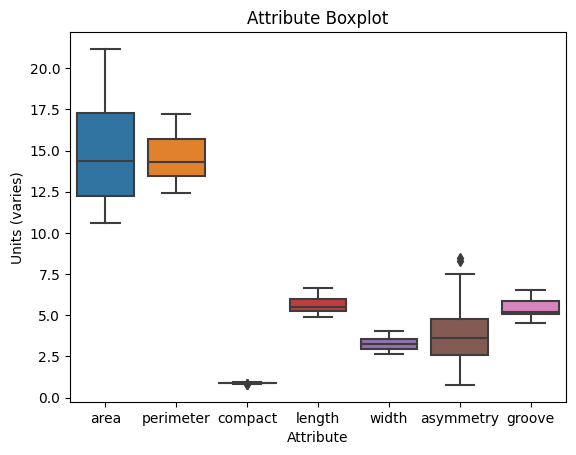

In [54]:
sns.boxplot(seeds.iloc[:,0:7])

plt.title("Attribute Boxplot")
plt.xlabel("Attribute")
plt.ylabel("Units (varies)")

plt.show()

The distributions of area and perimeter are shifted over quite far compared to the other attributes. Some scaling of variables may be required for use with techniques such as KNN, to ensure the attributes are properly weighted.  

We can also look at the distributions of the attributes when separated into the three seed types: the attributes with the greatest disparities may be useful when classifying, as they are likely the best indicators of different seed types.  

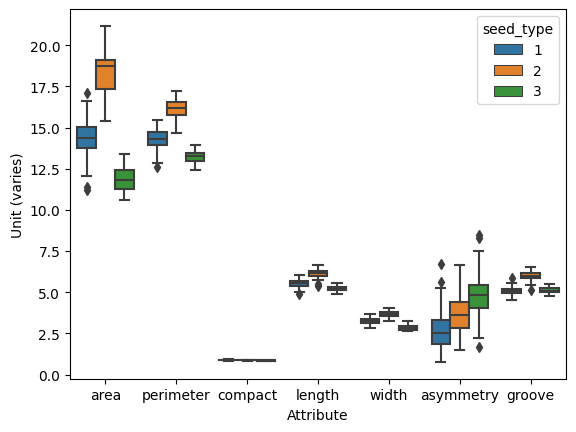

In [55]:
# boxplot grouped by seed type for each attribute 

sns.boxplot(x = "variable", y = "value", data = pd.melt(seeds, id_vars = "seed_type"), hue = "seed_type")
plt.xlabel("Attribute")
plt.ylabel("Unit (varies)")
plt.show()

The attributes area, perimeter, and asymmetry have the largest apparent disparities. The compactness of a seed does not appear to strongly affect its type. When scaled, the other attributes may also be useful, but more analysis is required. 